In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = ["SepalLengthCm", "PetalLengthCm"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119419cf8>,
      dtype=object)

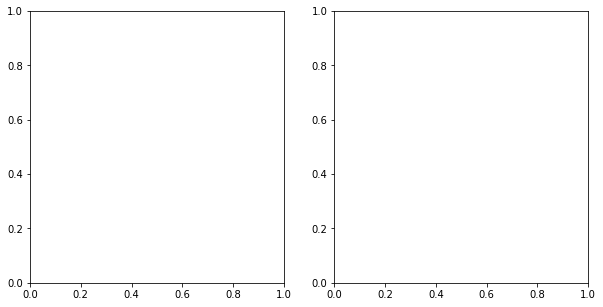

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes

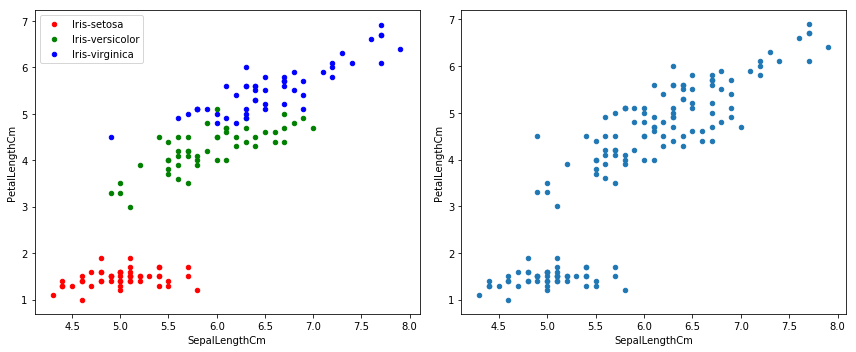

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

ax = axes[0]
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df1 = df[df.Species == v]
    df1.plot.scatter(features[0], features[1], ax = ax, color = colors[i], label = v)
ax.legend()

df[features].plot.scatter(0, 1, ax = axes[1])

plt.tight_layout()

In [18]:
scaler = preprocessing.StandardScaler()
X = df[features]
X_std = scaler.fit_transform(X)


In [20]:
k = 3
kmeans = cluster.KMeans(k, random_state= 1)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [21]:
kmeans.cluster_centers_

array([[ 0.03665519,  0.41727267],
       [-1.01511749, -1.22859407],
       [ 1.22961906,  1.02857275]])

In [22]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[5.87358491, 4.49245283],
       [5.00555556, 1.59814815],
       [6.85813953, 5.56744186]])

In [23]:
y_pred = kmeans.predict(X_std)

In [24]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

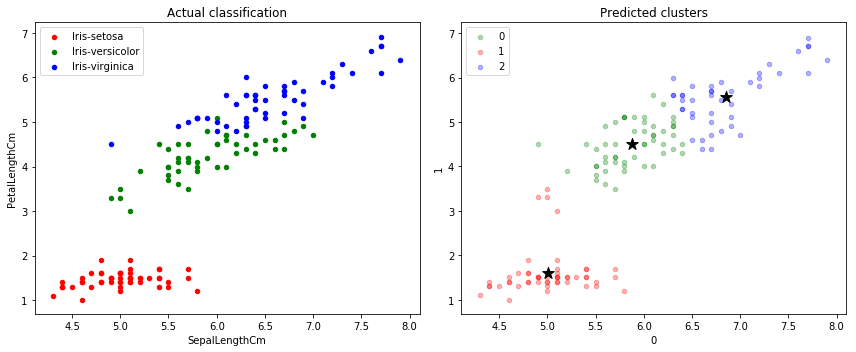

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

ax = axes[0]
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df1 = df[df.Species == v]
    df1.plot.scatter(features[0], features[1], ax = ax, color = colors[i], label = v)
ax.legend()
ax.set_title("Actual classification")


ax = axes[1] 
colors = ["green", "red", "blue"]
for i in range(k):
    df1 = df[y_pred == i]
    df1.plot.scatter(features[0], features[1], ax = ax, color = colors[i], label = i, alpha = 0.3)
ax.legend()
ax.set_title("Predicted clusters")

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))

centroids.plot.scatter(0, 1, ax = ax, marker = "*", color = "black", s = 150)

plt.tight_layout()

In [34]:
metrics.homogeneity_score(df.Species, y_pred)

0.5826296711195839

In [39]:
df["cluster"] = y_pred
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
117,118,7.7,3.8,6.7,2.2,Iris-virginica,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
48,49,5.3,3.7,1.5,0.2,Iris-setosa,1
104,105,6.5,3.0,5.8,2.2,Iris-virginica,2
103,104,6.3,2.9,5.6,1.8,Iris-virginica,2
65,66,6.7,3.1,4.4,1.4,Iris-versicolor,2
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,1
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,2
19,20,5.1,3.8,1.5,0.3,Iris-setosa,1
49,50,5.0,3.3,1.4,0.2,Iris-setosa,1


In [40]:
df.cluster.value_counts()

1    54
0    53
2    43
Name: cluster, dtype: int64

In [41]:
kmeans.inertia_

43.03887066676178

In [42]:
np.sqrt(kmeans.inertia_/len(df))

0.5356545570095326

In [51]:
kmeans.cluster_centers_[0]

array([0.03665519, 0.41727267])

In [50]:
kmeans.cluster_centers_[0].reshape((1, -1))

(1, 2)

In [59]:
distances = np.zeros(len(y_pred))
for i in range(k):
    center = kmeans.cluster_centers_[i]
    #print(metrics.euclidean_distances(X_std[y_pred == i], center.reshape(1, -1)).shape)
    distances[y_pred == i] = metrics.euclidean_distances(X_std[y_pred == i]
                                                        , center.reshape(1, -1)).squeeze()
df["distance"] = distances

In [65]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance
68,69,6.2,2.2,4.5,1.5,Iris-versicolor,0,0.395534
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,2,0.382920
64,65,5.6,2.9,3.6,1.3,Iris-versicolor,0,0.606173
134,135,6.1,2.6,5.6,1.4,Iris-virginica,0,0.686972
120,121,6.9,3.2,5.7,2.3,Iris-virginica,2,0.090856
21,22,5.1,3.7,1.5,0.4,Iris-setosa,1,0.127321
115,116,6.4,3.2,5.3,2.3,Iris-virginica,2,0.575574
80,81,5.5,2.4,3.8,1.1,Iris-versicolor,0,0.599966
42,43,4.4,3.2,1.3,0.2,Iris-setosa,1,0.753072
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0.170454


In [64]:
df.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.435640,53
1,0.402361,54
2,0.558198,43


In [66]:
def find_outliers(a):

    q1, q2, q3 = np.percentile(a, [25, 50, 75])
    iqr = q3 - q1
    lower_whisker = max(q1 - 1.5 * iqr, np.min(a))
    upper_whisker = min(q3 + 1.5 * iqr, np.max(a))

    q1, q2, q3, iqr, lower_whisker, upper_whisker

    is_outlier = (a < lower_whisker) | (a > upper_whisker)
    
    return is_outlier

In [68]:
anamolies = df[find_outliers(df.distance)]
anamolies

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance
106,107,4.9,2.5,4.5,1.7,Iris-virginica,0,1.179680
117,118,7.7,3.8,6.7,2.2,Iris-virginica,2,1.206364
118,119,7.7,2.6,6.9,2.3,Iris-virginica,2,1.270726
122,123,7.7,2.8,6.7,2.0,Iris-virginica,2,1.206364
131,132,7.9,3.8,6.4,2.0,Iris-virginica,2,1.348258


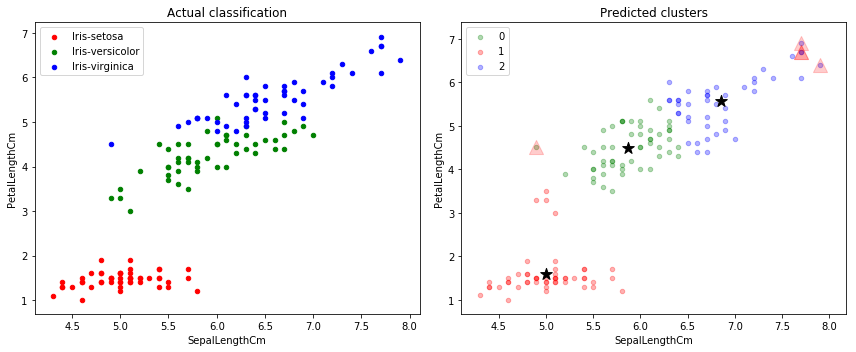

In [73]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

ax = axes[0]
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df1 = df[df.Species == v]
    df1.plot.scatter(features[0], features[1], ax = ax, color = colors[i], label = v)
ax.legend()
ax.set_title("Actual classification")


ax = axes[1] 
colors = ["green", "red", "blue"]
for i in range(k):
    df1 = df[y_pred == i]
    df1.plot.scatter(features[0], features[1], ax = ax, color = colors[i], label = i, alpha = 0.3)
ax.legend()
ax.set_title("Predicted clusters")

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))

centroids.plot.scatter(0, 1, ax = ax, marker = "*", color = "black", s = 150)

anamolies[features].plot.scatter(0, 1, color = "red", s = 200, ax = ax, marker="^", alpha = 0.2)

plt.tight_layout()